In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
from tld import get_tld
import re
from sklearn.model_selection import train_test_split
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score,log_loss,precision_score,recall_score,make_scorer,accuracy_score
import json

## Multi-Class Multi-Output Classification

In [9]:
l2=pd.read_csv("FinalDataset/URL/DefacementSitesURLFiltered.csv", header=None)
l2['result'] = [[] for _ in range(l2.shape[0])]
for i in range(l2.shape[0]):
    l2.at[i,'result'].append(1)
    l2.at[i,'result'].append(0)
    l2.at[i,'result'].append(0)
    l2.at[i,'result'].append(0)
l2['type'] = 'Defacement'
l2

,0,result,type
0,http://www.sinduscongoias.com.br/index.html,"[1, 0, 0, 0]",Defacement
1,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
2,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
3,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
4,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
...,...,...,...
96452,http://www.laurenzano.com.ar/index.php?option=...,"[1, 0, 0, 0]",Defacement
96453,http://www.laurenzano.com.ar/templates/laurenz...,"[1, 0, 0, 0]",Defacement
96454,http://www.laurenzano.com.ar/templates/laurenz...,"[1, 0, 0, 0]",Defacement
96455,http://www.laurenzano.com.ar/x.txt,"[1, 0, 0, 0]",Defacement


In [10]:
l3=pd.read_csv("FinalDataset/URL/Malware_dataset.csv", header=None)
l3['result'] = [[] for _ in range(l3.shape[0])]
for i in range(l3.shape[0]):
    l3.at[i,'result'].append(0)
    l3.at[i,'result'].append(1)
    l3.at[i,'result'].append(0)
    l3.at[i,'result'].append(0)
l3['type'] = 'Malware'
l3

,0,result,type
0,http://gzzax.livechatvalue.com/chat/chatClient...,"[0, 1, 0, 0]",Malware
1,http://gzzax.livechatvalue.com/chat/chatClient...,"[0, 1, 0, 0]",Malware
2,http://gzzax.livechatvalue.com/chat/chatClient...,"[0, 1, 0, 0]",Malware
3,http://gzzax.livechatvalue.com/chat/chatClient...,"[0, 1, 0, 0]",Malware
4,http://mtsx.com.cn/UploadFiles/2011-08/admin/%...,"[0, 1, 0, 0]",Malware
...,...,...,...
11561,http://www.plastischechirurgie.net/gesicht/fac...,"[0, 1, 0, 0]",Malware
11562,http://www.plastischechirurgie.net/haartranspl...,"[0, 1, 0, 0]",Malware
11563,http://www.plastischechirurgie.net/korper/gyna...,"[0, 1, 0, 0]",Malware
11564,http://dl.get1993desk.com/n/50517366/RealPlaye...,"[0, 1, 0, 0]",Malware


In [11]:
l4=pd.read_csv("FinalDataset/URL/phishing_dataset.csv", header=None)
l4['result'] = [[] for _ in range(l4.shape[0])]
for i in range(l4.shape[0]):
    l4.at[i,'result'].append(0)
    l4.at[i,'result'].append(0)
    l4.at[i,'result'].append(1)
    l4.at[i,'result'].append(0)
l4['type'] = 'Phishing'
l4

,0,result,type
0,http://v2.email-marketing.adminsimple.com/trac...,"[0, 0, 1, 0]",Phishing
1,http://bid.openx.net/json?amp;amp;amp;amp;cid;...,"[0, 0, 1, 0]",Phishing
2,http://webmail2.centurytel.net/hwebmail/servic...,"[0, 0, 1, 0]",Phishing
3,http://www.google.com.ng/imgres?imgurl=http://...,"[0, 0, 1, 0]",Phishing
4,http://webmail2.centurytel.net/hwebmail/servic...,"[0, 0, 1, 0]",Phishing
...,...,...,...
9960,http://highedgesolar.com/nw/includes/,"[0, 0, 1, 0]",Phishing
9961,http://jimfangimporters.yolasite.com/,"[0, 0, 1, 0]",Phishing
9962,http://liuheng.chengxuren.com/Images/,"[0, 0, 1, 0]",Phishing
9963,http://mcnaotempreco.net/site/portal/,"[0, 0, 1, 0]",Phishing


In [12]:
l5=pd.read_csv("FinalDataset/URL/spam_dataset.csv", header=None)
l5['result'] = [[] for _ in range(l5.shape[0])]
for i in range(l5.shape[0]):
    l5.at[i,'result'].append(0)
    l5.at[i,'result'].append(0)
    l5.at[i,'result'].append(0)
    l5.at[i,'result'].append(1)
l5['type'] = 'Spam'
l5

,0,result,type
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...,"[0, 0, 0, 1]",Spam
1,http://archive.salisburyjournal.co.uk/2007/3/6...,"[0, 0, 0, 1]",Spam
2,http://appbasic.jettons.co.uk/links/index.html,"[0, 0, 0, 1]",Spam
3,http://archive.yorkpress.co.uk/2003/11/6/25684...,"[0, 0, 0, 1]",Spam
4,http://acard4u.co.uk/product_reviews.php?cPath...,"[0, 0, 0, 1]",Spam
...,...,...,...
11995,http://archive.salisburyjournal.co.uk/2001/3/7/,"[0, 0, 0, 1]",Spam
11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,"[0, 0, 0, 1]",Spam
11997,http://archive.thisischeshire.co.uk/2000/1/14/...,"[0, 0, 0, 1]",Spam
11998,http://applerugs.co.uk/rugs/product_info.php?p...,"[0, 0, 0, 1]",Spam


In [13]:
data=[l2,l3,l4,l5]
dataset = pd.concat(data)
dataset

,0,result,type
0,http://www.sinduscongoias.com.br/index.html,"[1, 0, 0, 0]",Defacement
1,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
2,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
3,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
4,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
...,...,...,...
11995,http://archive.salisburyjournal.co.uk/2001/3/7/,"[0, 0, 0, 1]",Spam
11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,"[0, 0, 0, 1]",Spam
11997,http://archive.thisischeshire.co.uk/2000/1/14/...,"[0, 0, 0, 1]",Spam
11998,http://applerugs.co.uk/rugs/product_info.php?p...,"[0, 0, 0, 1]",Spam


In [14]:
dataset.to_csv('multiclass_urldata.csv')

In [15]:
urls = pd.read_csv("multiclass_urldata.csv")
urls = urls.rename({'0': 'url'}, axis=1)
urls

,Unnamed: 0,url,result,type
0,0,http://www.sinduscongoias.com.br/index.html,"[1, 0, 0, 0]",Defacement
1,1,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
2,2,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
3,3,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
4,4,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement
...,...,...,...,...
129983,11995,http://archive.salisburyjournal.co.uk/2001/3/7/,"[0, 0, 0, 1]",Spam
129984,11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,"[0, 0, 0, 1]",Spam
129985,11997,http://archive.thisischeshire.co.uk/2000/1/14/...,"[0, 0, 0, 1]",Spam
129986,11998,http://applerugs.co.uk/rugs/product_info.php?p...,"[0, 0, 0, 1]",Spam


<AxesSubplot:xlabel='type', ylabel='count'>

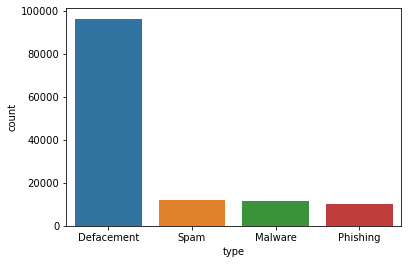

In [16]:
sns.countplot(x = 'type', data = urls, order = urls['type'].value_counts().index)

In [17]:
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
def directories(url):
    urldir = urlparse(url).path
    return urldir.count('/')

def digit(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

def letter(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

def ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|' 
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url) 
    if match:
        return 1
    else:
        return 0

In [18]:
urls['lengthOfURL']=urls['url'].apply(lambda i: len(str(i)))
urls['lengthOfHostname']=urls['url'].apply(lambda i: len(urlparse(i).netloc))
urls['lengthOfPath']=urls['url'].apply(lambda i: len(urlparse(i).path))
urls['tld'] = urls['url'].apply(lambda i: get_tld(i,fail_silently=True))
urls['lengthOfTLD'] = urls['tld'].apply(lambda i: tld_length(i))
urls=urls.drop(columns=['tld'])
urls['Tally(dir)'] = urls['url'].apply(lambda i: directories(i))
urls['Tally(digits)']= urls['url'].apply(lambda i: digit(i))
urls['Tally(letters)']= urls['url'].apply(lambda i: letter(i))
urls['IP'] = urls['url'].apply(lambda i: ip_address(i))
urls['Tally(.)'] = urls['url'].apply(lambda i: i.count('.'))
urls['Tally(-)'] = urls['url'].apply(lambda i: i.count('-'))
urls['Tally(@)'] = urls['url'].apply(lambda i: i.count('@'))
urls['Tally(%)'] = urls['url'].apply(lambda i: i.count('%'))
urls['Tally(=)'] = urls['url'].apply(lambda i: i.count('='))
urls['Tally(/)'] = urls['url'].apply(lambda i: i.count('/'))
urls['Tally(?)'] = urls['url'].apply(lambda i: i.count('?'))
urls['Tally(+)'] = urls['url'].apply(lambda i: i.count('+'))
urls['Tally(//)'] = urls['url'].apply(lambda i: i.count('//'))

In [19]:
urls

,Unnamed: 0,url,result,type,lengthOfURL,lengthOfHostname,lengthOfPath,lengthOfTLD,Tally(dir),Tally(digits),...,IP,Tally(.),Tally(-),Tally(@),Tally(%),Tally(=),Tally(/),Tally(?),Tally(+),Tally(//)
0,0,http://www.sinduscongoias.com.br/index.html,"[1, 0, 0, 0]",Defacement,43,25,11,6,1,0,...,0,4,0,0,0,0,3,0,0,1
1,1,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,58,25,26,6,2,1,...,0,5,0,0,0,0,4,0,0,1
2,2,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,66,25,34,6,3,0,...,0,4,0,0,0,0,5,0,0,1
3,3,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,65,25,33,6,3,0,...,0,4,0,0,0,0,5,0,0,1
4,4,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,109,25,77,6,3,0,...,0,4,7,0,0,0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129983,11995,http://archive.salisburyjournal.co.uk/2001/3/7/,"[0, 0, 0, 1]",Spam,47,30,10,5,4,6,...,0,3,0,0,0,0,6,0,0,1
129984,11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,"[0, 0, 0, 1]",Spam,81,19,55,5,4,23,...,0,3,2,0,0,0,6,0,0,1
129985,11997,http://archive.thisischeshire.co.uk/2000/1/14/...,"[0, 0, 0, 1]",Spam,57,28,22,5,4,13,...,0,4,0,0,0,0,6,0,0,1
129986,11998,http://applerugs.co.uk/rugs/product_info.php?p...,"[0, 0, 0, 1]",Spam,116,15,22,5,2,25,...,0,3,0,0,0,4,4,3,0,1


In [20]:
def adjuster(x):
    l=[]
    x=x.replace(',','')[1:-1].split(' ')
    for i in x:
        if i!=',' or i!=' ':
            l.append(int(i))
    return np.array(l)

urls['result_final'] = urls['result'].apply(lambda x:adjuster(x))
urls

,Unnamed: 0,url,result,type,lengthOfURL,lengthOfHostname,lengthOfPath,lengthOfTLD,Tally(dir),Tally(digits),...,Tally(.),Tally(-),Tally(@),Tally(%),Tally(=),Tally(/),Tally(?),Tally(+),Tally(//),result_final
0,0,http://www.sinduscongoias.com.br/index.html,"[1, 0, 0, 0]",Defacement,43,25,11,6,1,0,...,4,0,0,0,0,3,0,0,1,"[1, 0, 0, 0]"
1,1,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,58,25,26,6,2,1,...,5,0,0,0,0,4,0,0,1,"[1, 0, 0, 0]"
2,2,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,66,25,34,6,3,0,...,4,0,0,0,0,5,0,0,1,"[1, 0, 0, 0]"
3,3,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,65,25,33,6,3,0,...,4,0,0,0,0,5,0,0,1,"[1, 0, 0, 0]"
4,4,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,109,25,77,6,3,0,...,4,7,0,0,0,5,0,0,1,"[1, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129983,11995,http://archive.salisburyjournal.co.uk/2001/3/7/,"[0, 0, 0, 1]",Spam,47,30,10,5,4,6,...,3,0,0,0,0,6,0,0,1,"[0, 0, 0, 1]"
129984,11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,"[0, 0, 0, 1]",Spam,81,19,55,5,4,23,...,3,2,0,0,0,6,0,0,1,"[0, 0, 0, 1]"
129985,11997,http://archive.thisischeshire.co.uk/2000/1/14/...,"[0, 0, 0, 1]",Spam,57,28,22,5,4,13,...,4,0,0,0,0,6,0,0,1,"[0, 0, 0, 1]"
129986,11998,http://applerugs.co.uk/rugs/product_info.php?p...,"[0, 0, 0, 1]",Spam,116,15,22,5,2,25,...,3,0,0,0,4,4,3,0,1,"[0, 0, 0, 1]"


In [21]:
dt = DecisionTreeClassifier(max_depth=7)
clf = OneVsRestClassifier(dt)

In [22]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1': make_scorer(f1_score, average = 'micro'),
           'log_loss': make_scorer(log_loss)}

In [23]:
scores = cross_validate(clf, urls.drop(columns=['Unnamed: 0','url','result','type','result_final']), np.array(urls['result_final'].tolist()), cv=5,scoring=scoring,return_train_score=True)
scores

{'fit_time': array([0.69899416, 0.68295383, 0.68577838, 0.79151773, 0.407511  ]),
 'score_time': array([0.05886078, 0.05884409, 0.05800033, 0.05814338, 0.06201196]),
 'test_accuracy': array([0.89106854, 0.908993  , 0.91533964, 0.814017  , 0.04165865]),
 'train_accuracy': array([0.85609193, 0.85387056, 0.84609097, 0.87477762, 0.98216192]),
 'test_precision': array([0.9776318 , 0.96613148, 0.96174842, 0.89150023, 0.04185276]),
 'train_precision': array([0.9118116 , 0.91930427, 0.92509972, 0.93283768, 0.98216192]),
 'test_recall': array([0.90445419, 0.93045619, 0.93518732, 0.82586452, 0.04181252]),
 'train_recall': array([0.88539283, 0.87980575, 0.86976632, 0.90007789, 0.98216192]),
 'test_f1': array([0.93962038, 0.9479583 , 0.94828191, 0.85742812, 0.04183263]),
 'train_f1': array([0.89840804, 0.89912143, 0.8965801 , 0.91616503, 0.98216192]),
 'test_log_loss': array([ 0.38401962,  0.45856257,  0.65231182,  3.14285185, 33.03277624]),
 'train_log_loss': array([1.99946361, 1.81963979, 1.7034

In [24]:
print("The Fit Time is: ",scores['fit_time'].mean())
print("\n")
print("The Score Time is: ",scores['score_time'].mean())
print("\n")
print("The Train Accuracy score is: ",scores['train_accuracy'].mean())
print("\n")
print("The Train F1 score is: ",scores['train_f1'].mean())
print("\n")
print("The Train Precision score is: ",scores['train_precision'].mean())
print("\n")
print("The Train Recall score is: ",scores['train_recall'].mean())
print("\n")
print("The Train Log Loss is: ",scores['train_log_loss'].mean())
print("\n")
print("The Test Accuracy score is: ",scores['test_accuracy'].mean())
print("\n")
print("The Test F1 score is: ",scores['test_f1'].mean())
print("\n")
print("The Test Precision score is: ",scores['test_precision'].mean())
print("\n")
print("The Test Recall score is: ",scores['test_recall'].mean())
print("\n")
print("The Test Log Loss is: ",scores['test_log_loss'].mean())
print("\n")

The Fit Time is:  0.6533510208129882


The Score Time is:  0.05917210578918457


The Train Accuracy score is:  0.8825986019049085


The Train F1 score is:  0.918487300865497


The Train Precision score is:  0.9342430394114343


The Train Recall score is:  0.9034409419370917


The Train Log Loss is:  1.5145474583234138


The Test Accuracy score is:  0.7142153679179544


The Test F1 score is:  0.7470242687682899


The Test Precision score is:  0.7677729377071362


The Test Recall score is:  0.727554947896297


The Test Log Loss is:  7.534104419851332




In [25]:
dt = DecisionTreeClassifier(max_depth=7)
clf = OneVsRestClassifier(dt)

In [26]:
clf.fit(urls.drop(columns=['Unnamed: 0','url','result','type','result_final']), np.array(urls['result_final'].tolist()))

OneVsRestClassifier(estimator=DecisionTreeClassifier(max_depth=7))

lengthOfURL  has importance of  0.019154900780681904
lengthOfHostname  has importance of  0.03814387962871262
lengthOfPath  has importance of  0.15524703916441157
lengthOfTLD  has importance of  0.16306402469053183
Tally(dir)  has importance of  0.0934781011557206
Tally(digits)  has importance of  0.3449654857054978
Tally(letters)  has importance of  0.012472307790945615
IP  has importance of  0.0
Tally(.)  has importance of  0.020745847520102372
Tally(-)  has importance of  0.09079524420865472
Tally(@)  has importance of  0.0011879504113761397
Tally(%)  has importance of  0.00024247750401296377
Tally(=)  has importance of  0.01929994333856489
Tally(/)  has importance of  0.035741701646771144
Tally(?)  has importance of  0.005403006552894203
Tally(+)  has importance of  5.8089901121617936e-05
Tally(//)  has importance of  0.0


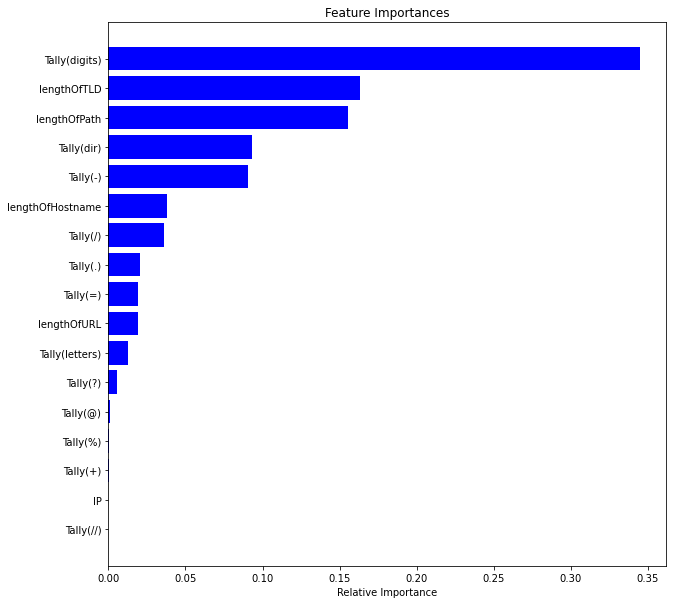

lengthOfURL  has importance of  0.09138489124008567
lengthOfHostname  has importance of  0.10752560910541907
lengthOfPath  has importance of  0.08054758153037156
lengthOfTLD  has importance of  0.00411285236440915
Tally(dir)  has importance of  0.0602075837282143
Tally(digits)  has importance of  0.0021376760460332608
Tally(letters)  has importance of  0.04849394496003326
IP  has importance of  0.0
Tally(.)  has importance of  0.0
Tally(-)  has importance of  0.009412736628076814
Tally(@)  has importance of  0.0
Tally(%)  has importance of  0.5582368333015048
Tally(=)  has importance of  0.03364338016501842
Tally(/)  has importance of  0.0
Tally(?)  has importance of  0.0042969109308336716
Tally(+)  has importance of  0.0
Tally(//)  has importance of  0.0


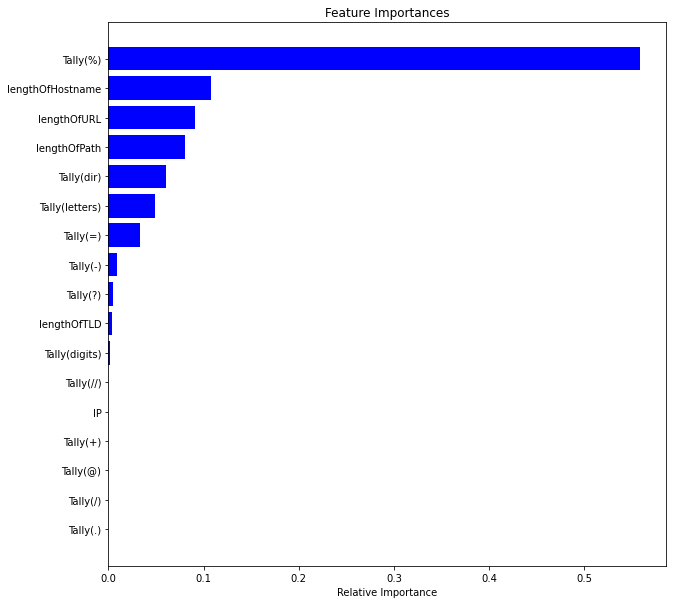

lengthOfURL  has importance of  0.017349348144978214
lengthOfHostname  has importance of  0.054097667942193894
lengthOfPath  has importance of  0.08684918666795353
lengthOfTLD  has importance of  0.004758570572011919
Tally(dir)  has importance of  0.04274973145890803
Tally(digits)  has importance of  0.1189347354343229
Tally(letters)  has importance of  0.016422695610768954
IP  has importance of  0.0017852909494320136
Tally(.)  has importance of  0.2778725646681102
Tally(-)  has importance of  0.05368110451050628
Tally(@)  has importance of  0.0007364855869878771
Tally(%)  has importance of  0.0027735873598007817
Tally(=)  has importance of  0.09467733210790946
Tally(/)  has importance of  0.139110693334598
Tally(?)  has importance of  0.0876926128789241
Tally(+)  has importance of  0.0005083927725937673
Tally(//)  has importance of  0.0


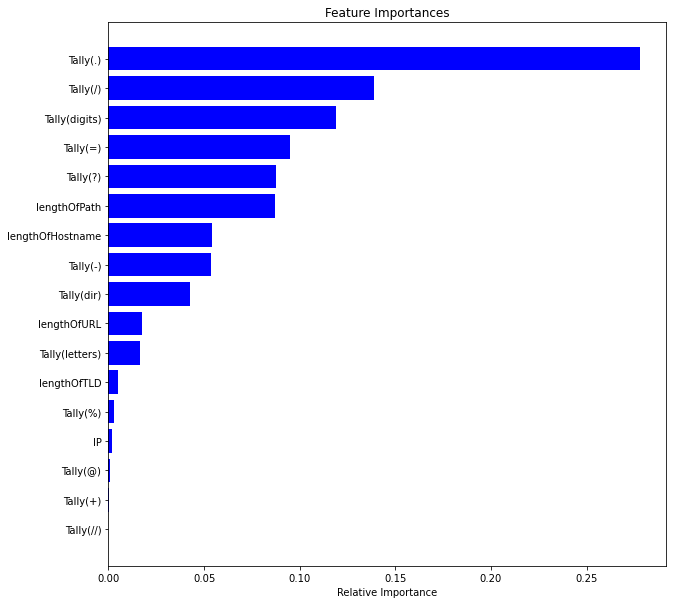

lengthOfURL  has importance of  0.007161980177669986
lengthOfHostname  has importance of  0.07459709422617318
lengthOfPath  has importance of  0.060079245889678896
lengthOfTLD  has importance of  0.6786035928550208
Tally(dir)  has importance of  0.002927393051189251
Tally(digits)  has importance of  0.1181810115695076
Tally(letters)  has importance of  0.0017074376409430385
IP  has importance of  0.0
Tally(.)  has importance of  0.025971332345072283
Tally(-)  has importance of  0.016685698039595992
Tally(@)  has importance of  0.0020616722423278454
Tally(%)  has importance of  0.0
Tally(=)  has importance of  0.0031197812080385667
Tally(/)  has importance of  0.0026142874113570798
Tally(?)  has importance of  0.0
Tally(+)  has importance of  9.83665468358188e-05
Tally(//)  has importance of  0.006191106796589487


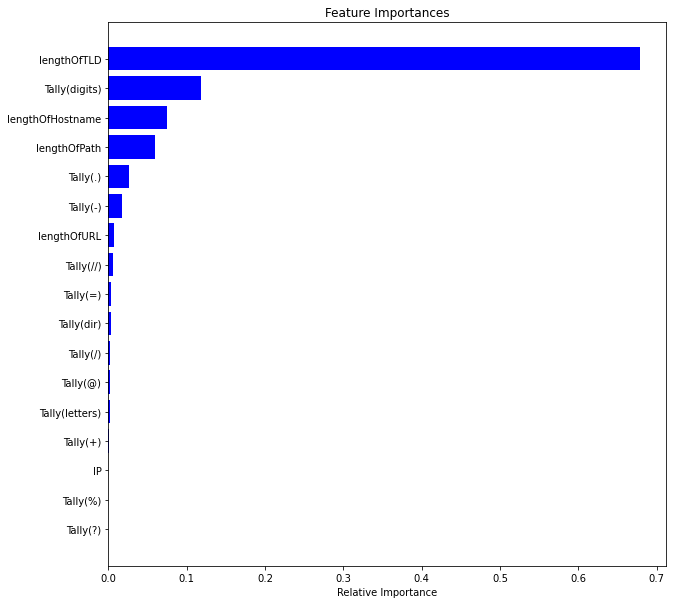

In [27]:
features = urls.drop(columns=['Unnamed: 0','url','result','type','result_final']).columns
for i in range(0,4):
    importances = clf.estimators_[i].feature_importances_
    indices = np.argsort(importances)
    for i in range(len(indices)):
        print(features[i]," has importance of ",importances[i])
    plt.figure(figsize=(10,10))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

## Multi Class Classification

In [28]:
l2=pd.read_csv("FinalDataset/URL/DefacementSitesURLFiltered.csv", header=None)
l2['result'] = [1 for _ in range(l2.shape[0])]
l2['type'] = 'Defacement'
l2

,0,result,type
0,http://www.sinduscongoias.com.br/index.html,1,Defacement
1,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
2,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
3,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
4,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
...,...,...,...
96452,http://www.laurenzano.com.ar/index.php?option=...,1,Defacement
96453,http://www.laurenzano.com.ar/templates/laurenz...,1,Defacement
96454,http://www.laurenzano.com.ar/templates/laurenz...,1,Defacement
96455,http://www.laurenzano.com.ar/x.txt,1,Defacement


In [29]:
l3=pd.read_csv("FinalDataset/URL/Malware_dataset.csv", header=None)
l3['result'] = [2 for _ in range(l3.shape[0])]
l3['type'] = 'Malware'
l3

,0,result,type
0,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
1,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
2,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
3,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
4,http://mtsx.com.cn/UploadFiles/2011-08/admin/%...,2,Malware
...,...,...,...
11561,http://www.plastischechirurgie.net/gesicht/fac...,2,Malware
11562,http://www.plastischechirurgie.net/haartranspl...,2,Malware
11563,http://www.plastischechirurgie.net/korper/gyna...,2,Malware
11564,http://dl.get1993desk.com/n/50517366/RealPlaye...,2,Malware


In [30]:
l4=pd.read_csv("FinalDataset/URL/phishing_dataset.csv", header=None)
l4['result'] = [3 for _ in range(l4.shape[0])]
l4['type'] = 'Phishing'
l4

,0,result,type
0,http://v2.email-marketing.adminsimple.com/trac...,3,Phishing
1,http://bid.openx.net/json?amp;amp;amp;amp;cid;...,3,Phishing
2,http://webmail2.centurytel.net/hwebmail/servic...,3,Phishing
3,http://www.google.com.ng/imgres?imgurl=http://...,3,Phishing
4,http://webmail2.centurytel.net/hwebmail/servic...,3,Phishing
...,...,...,...
9960,http://highedgesolar.com/nw/includes/,3,Phishing
9961,http://jimfangimporters.yolasite.com/,3,Phishing
9962,http://liuheng.chengxuren.com/Images/,3,Phishing
9963,http://mcnaotempreco.net/site/portal/,3,Phishing


In [31]:
l5=pd.read_csv("FinalDataset/URL/spam_dataset.csv", header=None)
l5['result'] = [4 for _ in range(l5.shape[0])]
l5['type'] = 'Spam'
l5

,0,result,type
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...,4,Spam
1,http://archive.salisburyjournal.co.uk/2007/3/6...,4,Spam
2,http://appbasic.jettons.co.uk/links/index.html,4,Spam
3,http://archive.yorkpress.co.uk/2003/11/6/25684...,4,Spam
4,http://acard4u.co.uk/product_reviews.php?cPath...,4,Spam
...,...,...,...
11995,http://archive.salisburyjournal.co.uk/2001/3/7/,4,Spam
11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,4,Spam
11997,http://archive.thisischeshire.co.uk/2000/1/14/...,4,Spam
11998,http://applerugs.co.uk/rugs/product_info.php?p...,4,Spam


In [32]:
data=[l2,l3,l4,l5]
dataset = pd.concat(data)
dataset

,0,result,type
0,http://www.sinduscongoias.com.br/index.html,1,Defacement
1,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
2,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
3,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
4,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
...,...,...,...
11995,http://archive.salisburyjournal.co.uk/2001/3/7/,4,Spam
11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,4,Spam
11997,http://archive.thisischeshire.co.uk/2000/1/14/...,4,Spam
11998,http://applerugs.co.uk/rugs/product_info.php?p...,4,Spam


In [33]:
urls['result1'] = dataset['result'].tolist()

In [34]:
urls

,Unnamed: 0,url,result,type,lengthOfURL,lengthOfHostname,lengthOfPath,lengthOfTLD,Tally(dir),Tally(digits),...,Tally(-),Tally(@),Tally(%),Tally(=),Tally(/),Tally(?),Tally(+),Tally(//),result_final,result1
0,0,http://www.sinduscongoias.com.br/index.html,"[1, 0, 0, 0]",Defacement,43,25,11,6,1,0,...,0,0,0,0,3,0,0,1,"[1, 0, 0, 0]",1
1,1,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,58,25,26,6,2,1,...,0,0,0,0,4,0,0,1,"[1, 0, 0, 0]",1
2,2,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,66,25,34,6,3,0,...,0,0,0,0,5,0,0,1,"[1, 0, 0, 0]",1
3,3,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,65,25,33,6,3,0,...,0,0,0,0,5,0,0,1,"[1, 0, 0, 0]",1
4,4,http://www.sinduscongoias.com.br/index.php/ins...,"[1, 0, 0, 0]",Defacement,109,25,77,6,3,0,...,7,0,0,0,5,0,0,1,"[1, 0, 0, 0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129983,11995,http://archive.salisburyjournal.co.uk/2001/3/7/,"[0, 0, 0, 1]",Spam,47,30,10,5,4,6,...,0,0,0,0,6,0,0,1,"[0, 0, 0, 1]",4
129984,11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,"[0, 0, 0, 1]",Spam,81,19,55,5,4,23,...,2,0,0,0,6,0,0,1,"[0, 0, 0, 1]",4
129985,11997,http://archive.thisischeshire.co.uk/2000/1/14/...,"[0, 0, 0, 1]",Spam,57,28,22,5,4,13,...,0,0,0,0,6,0,0,1,"[0, 0, 0, 1]",4
129986,11998,http://applerugs.co.uk/rugs/product_info.php?p...,"[0, 0, 0, 1]",Spam,116,15,22,5,2,25,...,0,0,0,4,4,3,0,1,"[0, 0, 0, 1]",4


In [35]:
dt1 = DecisionTreeClassifier(max_depth=7)

In [36]:
scoring1 = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'weighted'),
           'recall': make_scorer(recall_score, average = 'weighted'),
           'f1': make_scorer(f1_score, average = 'weighted')}

In [37]:
scores = cross_validate(dt1, urls.drop(columns=['Unnamed: 0','url','result','type','result_final','result1']), urls['result1'], cv=5,scoring=scoring1,return_train_score=True)
scores

{'fit_time': array([0.18697095, 0.18715382, 0.18285775, 0.19971204, 0.19367552]),
 'score_time': array([0.01698589, 0.01595688, 0.01598668, 0.01702356, 0.01593518]),
 'test_accuracy': array([0.80275406, 0.8811447 , 0.86325871, 0.85513713, 0.85067508]),
 'train_accuracy': array([0.90959708, 0.9035965 , 0.90711607, 0.91504072, 0.91581964]),
 'test_precision': array([0.78827756, 0.87066653, 0.85228525, 0.82979149, 0.82181253]),
 'train_precision': array([0.90459593, 0.89729487, 0.90333747, 0.91178972, 0.91357464]),
 'test_recall': array([0.80275406, 0.8811447 , 0.86325871, 0.85513713, 0.85067508]),
 'train_recall': array([0.90959708, 0.9035965 , 0.90711607, 0.91504072, 0.91581964]),
 'test_f1': array([0.78452226, 0.86709489, 0.85510879, 0.82938667, 0.82069042]),
 'train_f1': array([0.90005847, 0.88988978, 0.90462648, 0.90985422, 0.91135593])}

In [38]:
print("The Fit Time is: ",scores['fit_time'].mean())
print("\n")
print("The Score Time is: ",scores['score_time'].mean())
print("\n")
print("The Train Accuracy score is: ",scores['train_accuracy'].mean())
print("\n")
print("The Train F1 score is: ",scores['train_f1'].mean())
print("\n")
print("The Train Precision score is: ",scores['train_precision'].mean())
print("\n")
print("The Train Recall score is: ",scores['train_recall'].mean())
print("\n")
print("The Test Accuracy score is: ",scores['test_accuracy'].mean())
print("\n")
print("The Test F1 score is: ",scores['test_f1'].mean())
print("\n")
print("The Test Precision score is: ",scores['test_precision'].mean())
print("\n")
print("The Test Recall score is: ",scores['test_recall'].mean())
print("\n")

The Fit Time is:  0.19007401466369628


The Score Time is:  0.016377639770507813


The Train Accuracy score is:  0.9102340016148421


The Train F1 score is:  0.9031569759580724


The Train Precision score is:  0.9061185263780562


The Train Recall score is:  0.9102340016148421


The Test Accuracy score is:  0.8505939365505739


The Test F1 score is:  0.8313606061629562


The Test Precision score is:  0.8325666714928281


The Test Recall score is:  0.8505939365505739




In [39]:
dt1 = DecisionTreeClassifier(max_depth=7)

In [40]:
dt1.fit(urls.drop(columns=['Unnamed: 0','url','result','type','result_final','result1']), urls['result1'])

DecisionTreeClassifier(max_depth=7)

lengthOfURL  has importance of  0.03860760147768041
lengthOfHostname  has importance of  0.07728986154352531
lengthOfPath  has importance of  0.025971469354237234
lengthOfTLD  has importance of  0.29373469607837976
Tally(dir)  has importance of  0.05986147505879365
Tally(digits)  has importance of  0.2315200366753772
Tally(letters)  has importance of  0.0012696190954790902
IP  has importance of  0.0
Tally(.)  has importance of  0.04702331563169226
Tally(-)  has importance of  0.06796462101184407
Tally(@)  has importance of  0.0009711423491761612
Tally(%)  has importance of  0.08579740976468156
Tally(=)  has importance of  0.04877805480788055
Tally(/)  has importance of  0.015238730810622755
Tally(?)  has importance of  0.005170366199069171
Tally(+)  has importance of  0.0
Tally(//)  has importance of  0.0008016001415606351


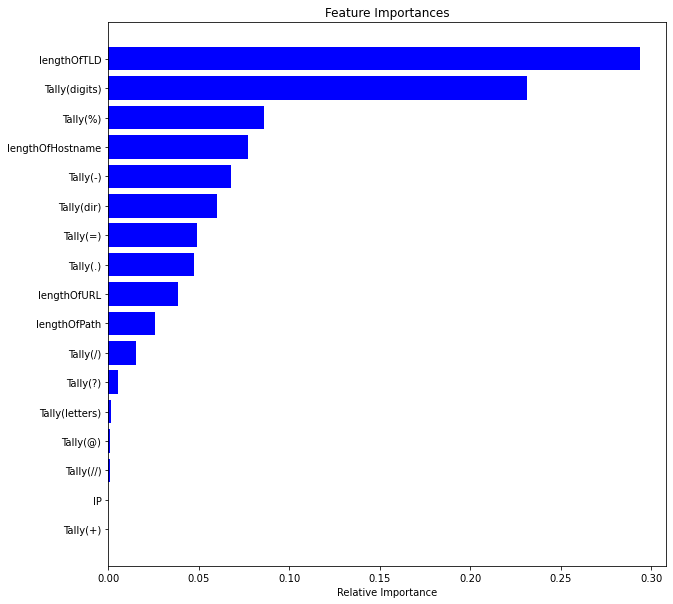

In [41]:
features = urls.drop(columns=['Unnamed: 0','url','result','type','result_final','result1']).columns
importances = dt1.feature_importances_
indices = np.argsort(importances)
for i in range(len(indices)):
    print(features[i]," has importance of ",importances[i])
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Testing

In [42]:
def lengthOfURL(url):
    return len(str(url))

def lengthOfHostname(url):
    return len(urlparse(url).netloc)

def lengthOfPath(url):
    return len(urlparse(url).path)

def tld(url):
    x=get_tld(url,fail_silently=True)
    try:
        return len(x)
    except:
        return -1

def Tally_dot(url):
    return url.count('.')

def Tally_us(url):
    return url.count('-')

def Tally_atr(url):
    return url.count('@')

def Tally_per(url):
    return url.count('%')

def Tally_eq(url):
    return url.count('=')

def Tally_sl(url):
    return url.count('/')

def Tally_qu(url):
    return url.count('?')

def Tally_pl(url):
    return url.count('+')

def Tally_dsl(url):
    return url.count('//')

def directories(url):
    urldir = urlparse(url).path
    return urldir.count('/')

def digit(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

def letter(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

def ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|' 
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url) 
    if match:
        return 1
    else:
        return 0

def parameter(url):
    l=[lengthOfURL(url),lengthOfHostname(url),lengthOfPath(url),tld(url),Tally_dot(url),Tally_us(url),Tally_atr(url),Tally_per(url),
       Tally_eq(url),Tally_sl(url),Tally_qu(url),Tally_pl(url),Tally_dsl(url),directories(url),digit(url),letter(url),ip_address(url)]
    return l

l1=parameter("http://localhost:8888/notebooks/Capstone%20Project/Multi-Class%20Classification%20using%20Decision%20Tree.ipynb")
print(l1)

p=np.array([l1])

multi_output_prediction = clf.predict(p)

multi_output_prediction_probability = clf.predict_proba(p)

multi_class_prediction = dt1.predict(p)

print(multi_output_prediction, multi_class_prediction, multi_output_prediction_probability)

[111, 14, 90, -1, 1, 1, 0, 5, 0, 5, 0, 0, 1, 3, 14, 83, 0]
[[1 0 1 0]] [1] [[0.88260699 0.05820635 1.         0.        ]]
